In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sb


df = pd.read_csv('2021.csv')
df.head()

,id,age,Дата первого занятия,Курс,М2
0,2538,11.0,28.02.2021,Unity,0
1,2615,12.0,14.02.2021,Unity,0
2,2643,14.0,21.02.2021,Веб-дизайн,1
3,2968,11.0,24.01.2021,Python Базовый,0
4,3014,15.0,14.03.2021,Веб-дизайн,1


In [250]:
# Предобработка
df = df.dropna()
df['Дата первого занятия'] = df['Дата первого занятия'].apply(lambda date: datetime.strptime(date, '%d.%m.%Y'))
df['age'] = df['age'].astype(int)
df.head()

,id,age,Дата первого занятия,Курс,М2
0,2538,11,2021-02-28,Unity,0
1,2615,12,2021-02-14,Unity,0
2,2643,14,2021-02-21,Веб-дизайн,1
3,2968,11,2021-01-24,Python Базовый,0
4,3014,15,2021-03-14,Веб-дизайн,1


In [251]:
def get_count(course, m2=False):
  if not m2:    
    return len(df[(datetime(2021, 3, 1) < df['Дата первого занятия'] + 
                  timedelta(days=28)) & (df['М2'] == 0) & (df['Курс'] == course)])
  return len(df[(df['М2'] == 1) & (df['Курс'] == course)])

No handles with labels found to put in legend.


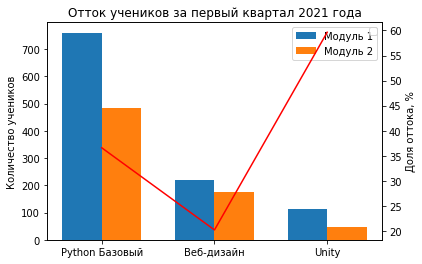

In [324]:
courses = ['Python Базовый', 'Веб-дизайн', 'Unity']
python_basic_count1 = get_count(course=courses[0])
python_basic_count2 = get_count(course=courses[0], m2=True)

web_design_count1 = get_count(course=courses[1])
web_design_count2 = get_count(course=courses[1], m2=True)

unity_count1 = get_count(course=courses[2])
unity_count2 = get_count(course=courses[2], m2=True)

x = np.arange(len(courses))
width = 0.35

y1 = [python_basic_count1, web_design_count1, unity_count1]
y2 = [python_basic_count2, web_design_count2, unity_count2]

fig, ax1 = plt.subplots()
cols1 = ax1.bar(x - width / 2, y1, width, label='Модуль 1')
cols2 = ax1.bar(x + width / 2, y2, width, label='Модуль 2')

ax1.set_ylabel('Количество учеников')
ax1.set_title('Отток учеников за первый квартал 2021 года')
ax1.set_xticks(x)
ax1.set_xticklabels(courses)

ax2 = ax1.twinx()
ax2.set_ylabel('Доля оттока, %')

y = [(p1 - p2) / p1 * 100 for p1, p2 in zip(y1, y2)]
sb.lineplot(y=y, x=x, color='red')

ax1.legend()
plt.show()

# Вывод

Наблюдается отток учеников после первого модуля для всех курсов:
*   наибольший отток зафиксирован для курса **Unity**;
*   наименьший отток зафиксирован для курса **Веб-дизайн**.